I used cartopy to plot maps

documentation

https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html

K means clustering refernce link : https://youtu.be/5w5iUbTlpMQ?feature=shared                                                                                                            and andrew ng ML course

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We are using Pandas to get data from CSV

In [28]:
df = pd.read_csv(r"D:\notebooks for ML\Task 2\data\clustering_data.csv")

C:\Users\kolet\AppData\Local\Temp\ipykernel_19704\1208121521.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\notebooks for ML\Task 2\data\clustering_data.csv")


In [ ]:
I took only data set that is from Telangana

In [29]:
Telangana = df.loc[(df['StateName'] == 'TELANGANA')]

In [43]:
Telangana

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.6845544,78.0773742
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.3096558,77.9466324
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.2108201,78.4853495
...,...,...,...,...,...,...,...,...,...,...,...
150614,Telangana Circle,Hyderabad Region,Nalgonda Division,Valigonda S.O,508112,PO,Delivery,YADADRI BHUVANAGIRI,TELANGANA,17.377222,79.0245556
151046,Telangana Circle,Hyderabad City Region,Medak Division,Makkarajpet S.O,502247,PO,Delivery,MEDAK,TELANGANA,17.949361,78.5200556
151047,Telangana Circle,Hyderabad City Region,Medak Division,Rajpally S.O,502117,PO,Delivery,MEDAK,TELANGANA,18.019889,78.2949444
151048,Telangana Circle,Hyderabad City Region,Medak Division,Toopran S.O,502334,PO,Delivery,MEDAK,TELANGANA,17.905167,78.4610833


We took latitudes and longitudes into numpy arrays each

In [44]:
Latitudes = Telangana['Latitude'].to_numpy()
Longitudes = Telangana['Longitude'].to_numpy()

In [46]:
Latitudes?

Type:        ndarray
String form: ['18.6845544' '18.5329923' '18.5329923' ... 18.0198889 17.9051667 18.04325]
Length:      5816
File:        c:\users\kolet\appdata\roaming\python\python311\site-packages\numpy\__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : t

So we can see here latitudes and longitudes are not in float data type. We will convert them into floating point numbers

Converting Latitudes and Longitudes data type to float
When we convert them to float, we even convert errors like no latitude and longitude into NaN value
we will clean data later

In [34]:
Latitudes = Latitudes.astype(np.float64)
Latitudes

array([18.6845544, 18.5329923, 18.5329923, ..., 18.0198889, 17.9051667,
       18.04325  ])

In [35]:
Longitudes = Longitudes.astype(np.float64)
Longitudes

array([78.0773742, 77.618717 , 77.618717 , ..., 78.2949444, 78.4610833,
       78.1363056])

Removing errors and NaN values from latitudes and longitudes
Cleaning data 

In [36]:
valid_indices = ~np.isnan(Latitudes) & ~np.isnan(Longitudes)
valid_latitudes = Latitudes[valid_indices]
valid_longitudes = Longitudes[valid_indices]

In [47]:
latitudes = valid_latitudes
longitudes = valid_longitudes

stacking latitudes and longitudes into one 2d numpy array

In [49]:
coordinates = np.stack((latitudes,longitudes),axis = 1)

Lets remove duplicates

In [51]:
unique_lat_long_pairs = np.unique(coordinates, axis=0)
coordinates = unique_lat_long_pairs

Installing cartopy for plotting maps

In [38]:
!pip install cartopy

In [39]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Plotting latitudes and longitudes on a map

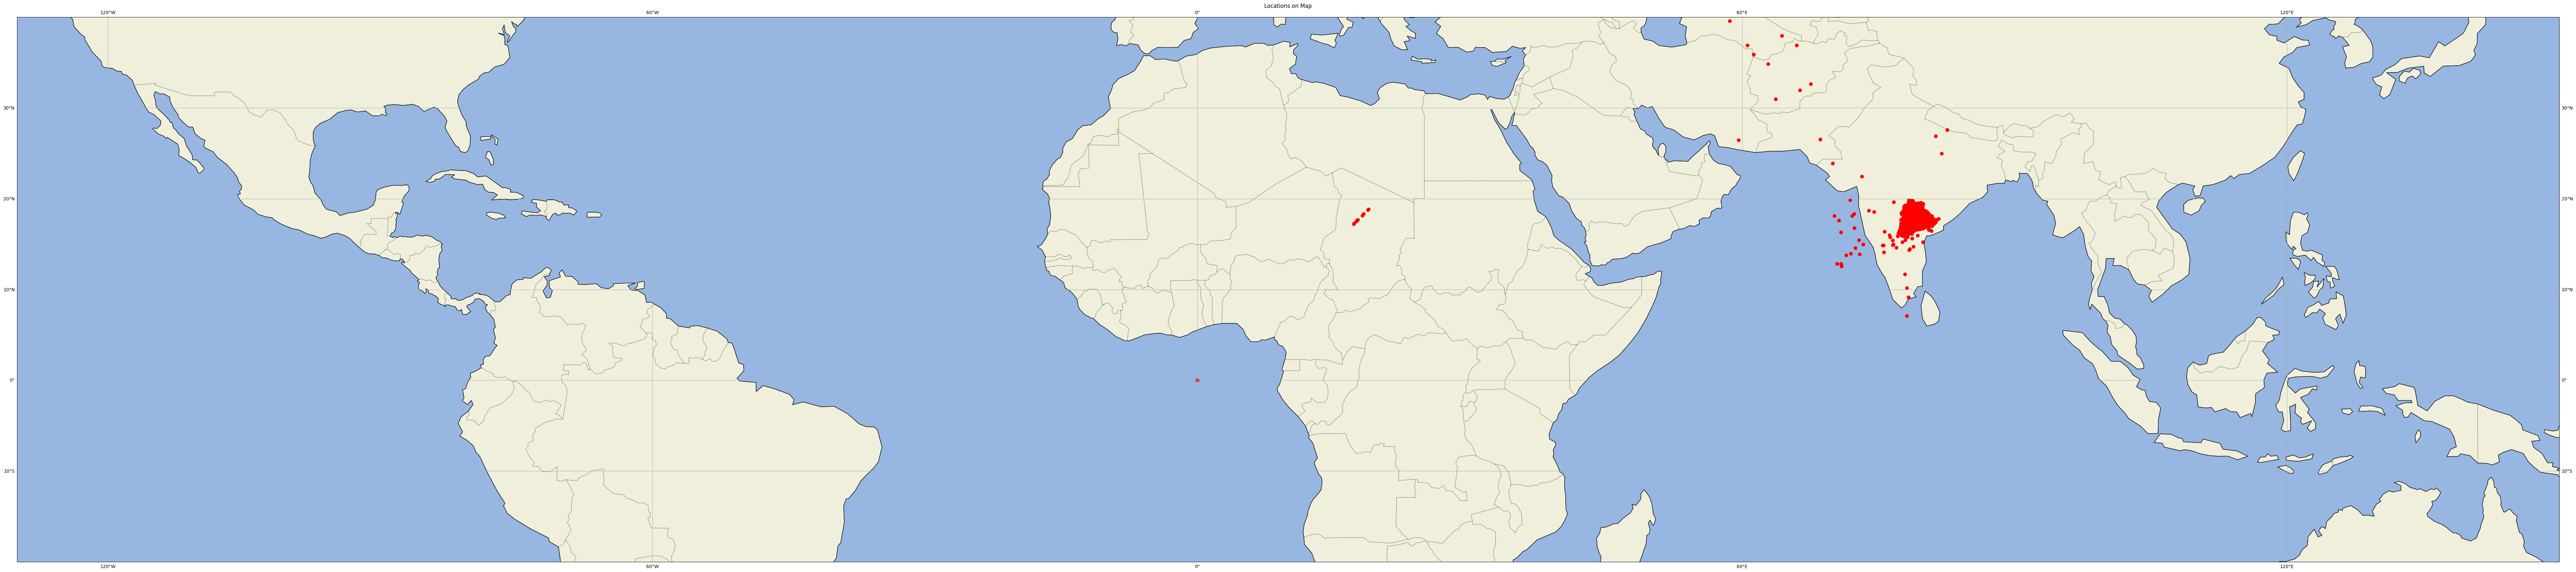

In [52]:
# Create a figure and a map projection
fig = plt.figure(figsize=(100, 50))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Plot the points
plt.scatter(coordinates[:,1], coordinates[:,0], color='red', s=50, transform=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True)

# Set extent (optional, to zoom into a region)
ax.set_extent([-130, 150, -20, 40], crs=ccrs.PlateCarree())

plt.title('Locations on Map')
plt.show()

we can see coordinates out of Telangana and some coordinates even out of India :D

We know Top most latitudes top and bottom of Telangana and the Longitudes east and west of Telangana

Top Latitude is 20 North
Bottom Latitude is 15 North
Longitude on west is 77 E
Longitude on east is 82E

In [58]:
longitudes = coordinates[:, 1]

valid_longitudes = (longitudes >= 77) & (longitudes <= 82)

coordinates = coordinates[valid_longitudes]

In [59]:
latitudes = coordinates[:, 0]

valid_latitudes = (latitudes >= 15) & (latitudes <= 20)

coordinates = coordinates[valid_latitudes]

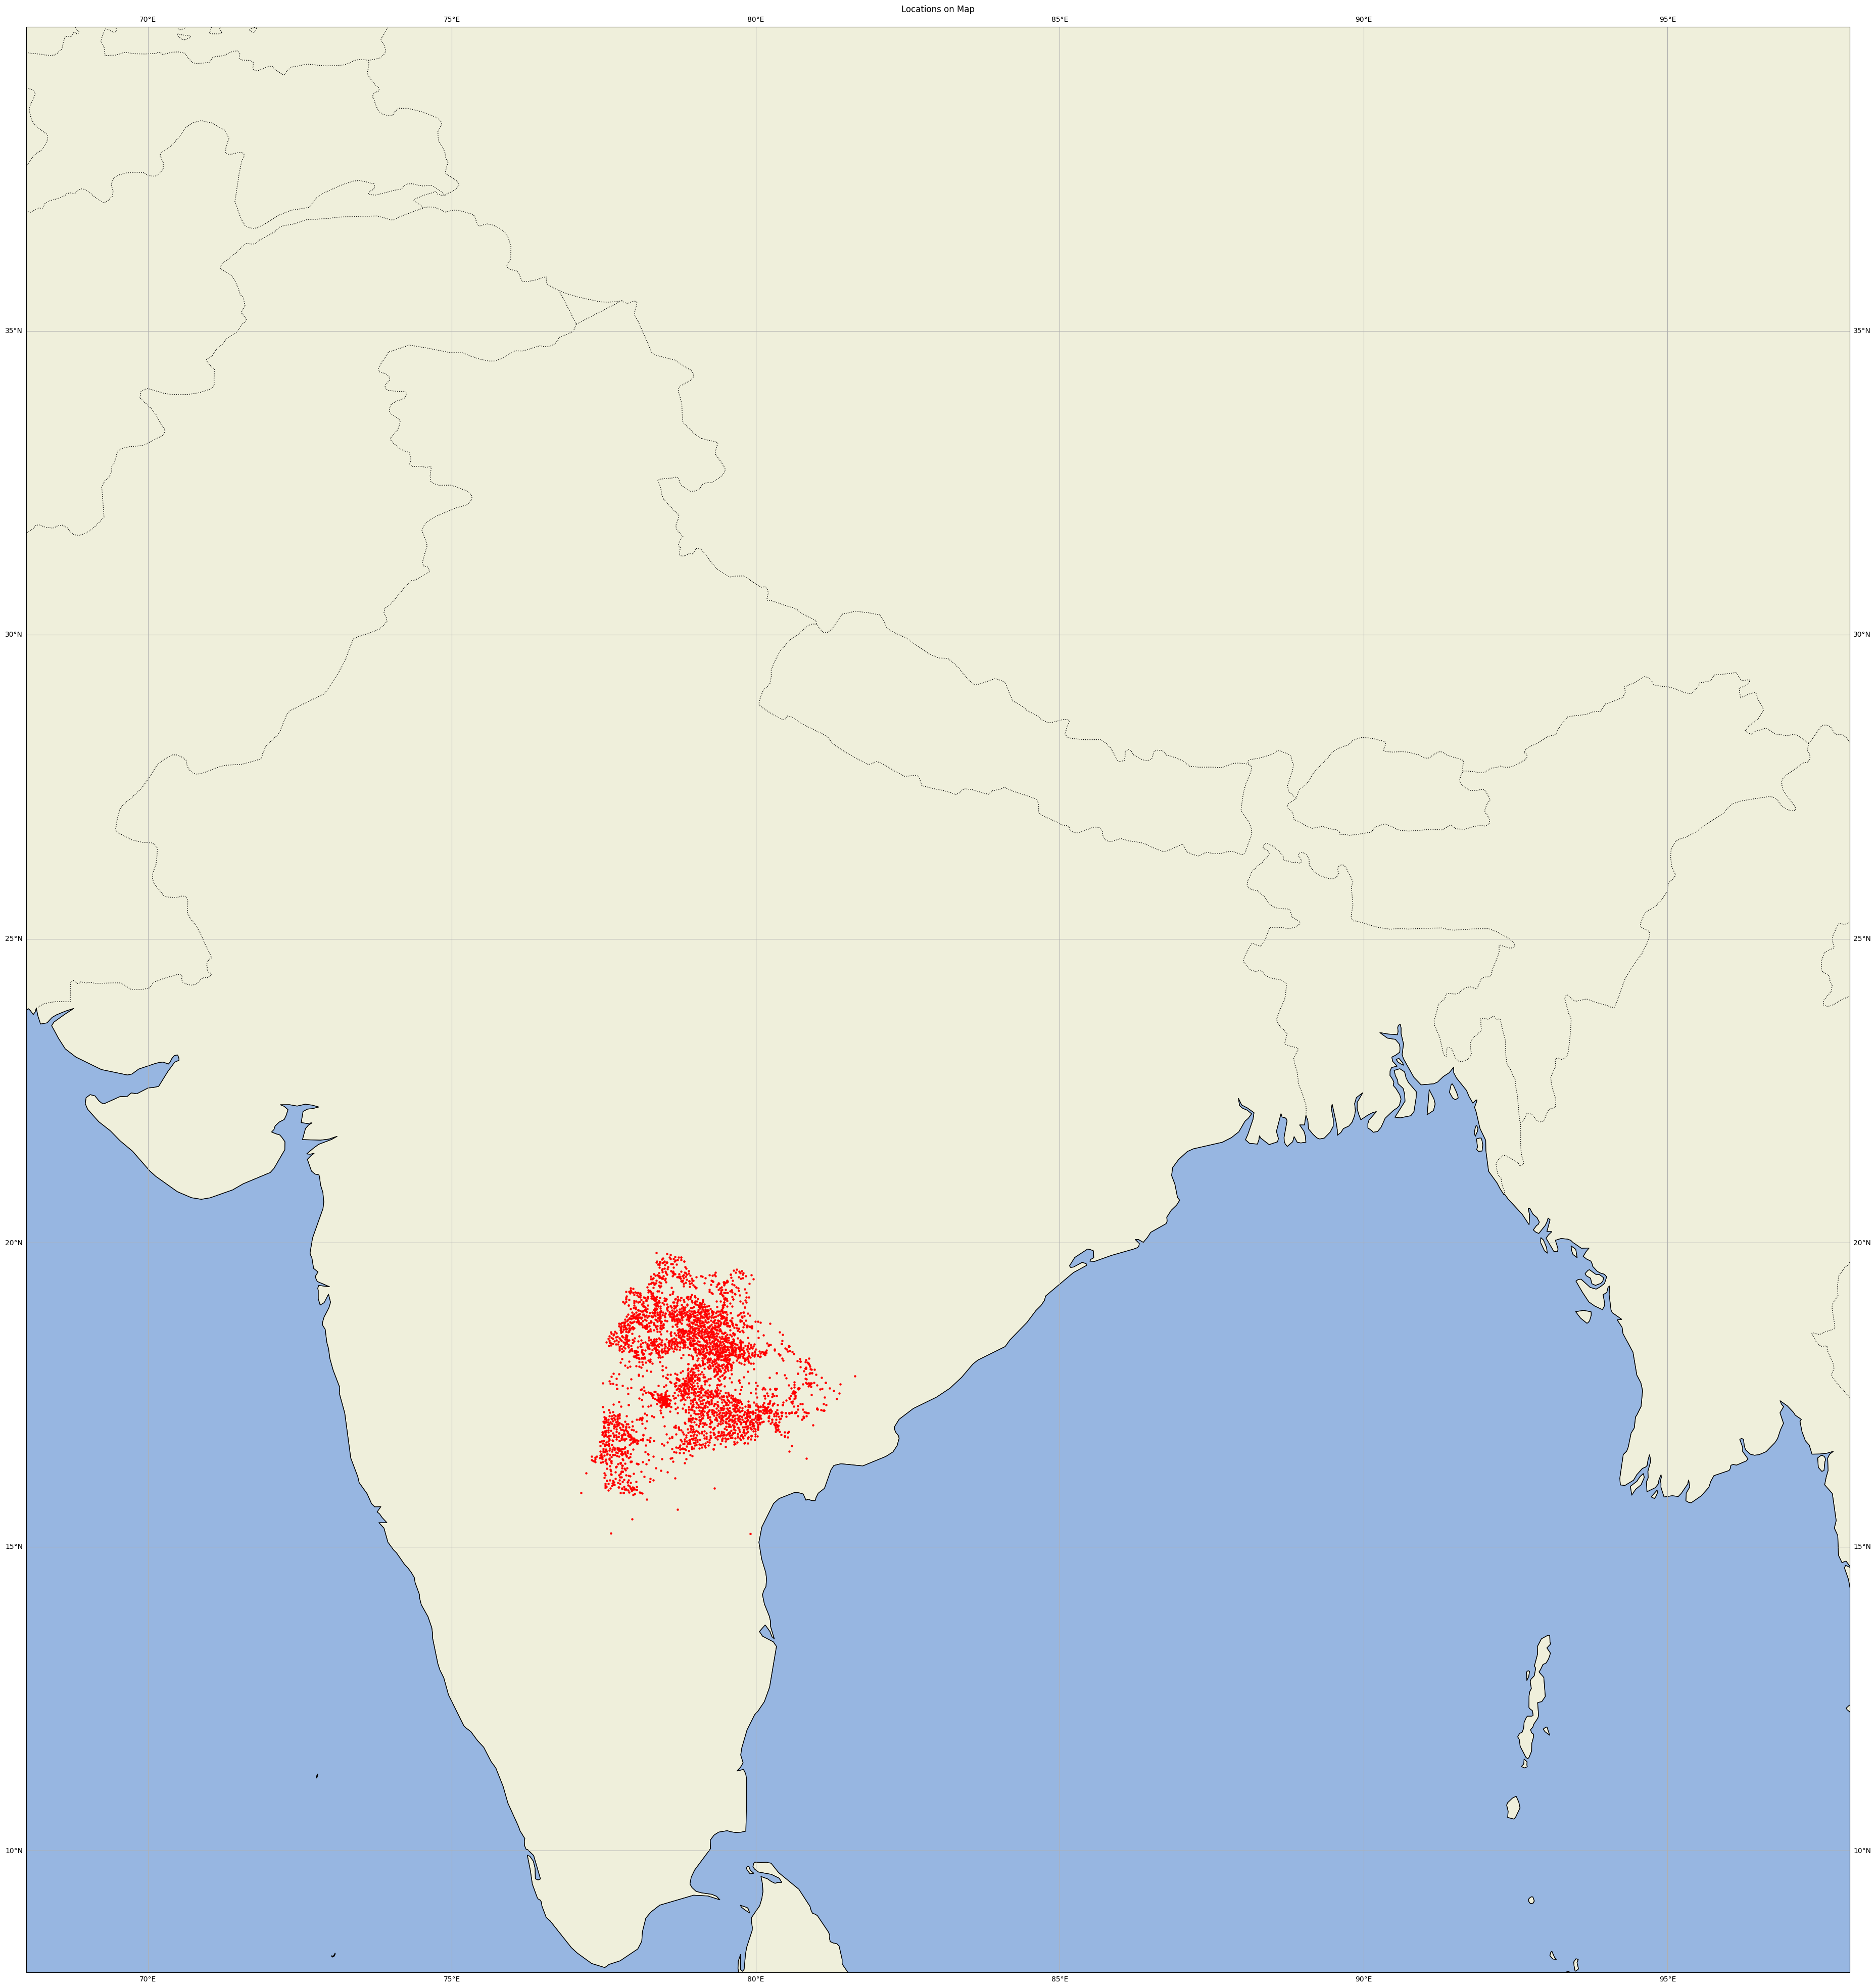

In [60]:
# Create a figure and a map projection
fig = plt.figure(figsize=(100, 50))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Plot the points
plt.scatter(coordinates[:,1], coordinates[:,0], color='red', s=5, transform=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True)

# Set extent (optional, to zoom into a region)
ax.set_extent([68, 98, 8, 40], crs=ccrs.PlateCarree())

plt.title('Locations on Map')
plt.show()

we made K means cluster from starch

In [61]:
def k_mean(X, Y, k, iter):
    centroids = initial_centroid(X, Y, k)

    for i in range(iter):
        clusters_x = np.zeros(k)
        clusters_y = np.zeros(k)
        clusters_size = np.zeros(k)

        for j in range(X.shape[0]):
            index = assign_clusters(X[j], Y[j], centroids)
            clusters_x[index] += X[j]
            clusters_y[index] += Y[j]
            clusters_size[index] += 1

        for j in range(k):
            if clusters_size[j] != 0:
                centroids[j] = [min(max(clusters_x[j] / clusters_size[j],min(longitudes)),max(longitudes)), min(max(clusters_y[j] / clusters_size[j],min(latitudes)),max(latitudes))]

    return centroids


Implementation of K mean cluster

In [62]:
clustering = k_mean(coordinates[:,1],coordinates[:,0],20,200)
clustering

array([[78.40594404, 17.41239287],
       [78.50473536, 18.84395886],
       [79.0190916 , 18.85512367],
       [78.96264635, 16.80580061],
       [79.47971958, 18.10308296],
       [80.1778389 , 18.26172728],
       [77.81351326, 16.16897566],
       [79.53365495, 19.24058401],
       [78.3164222 , 18.23952913],
       [77.82503088, 18.36298985],
       [77.74740847, 16.81272443],
       [78.08062111, 18.89808571],
       [79.49889509, 18.60980471],
       [78.96069966, 18.39451478],
       [80.82379703, 17.64165551],
       [80.26808058, 17.20890824],
       [78.92419662, 17.65946576],
       [79.74810455, 17.00168949],
       [79.35527832, 17.30616071],
       [78.59928392, 19.49925295]])

Plotting K mean clusters coordinates in map

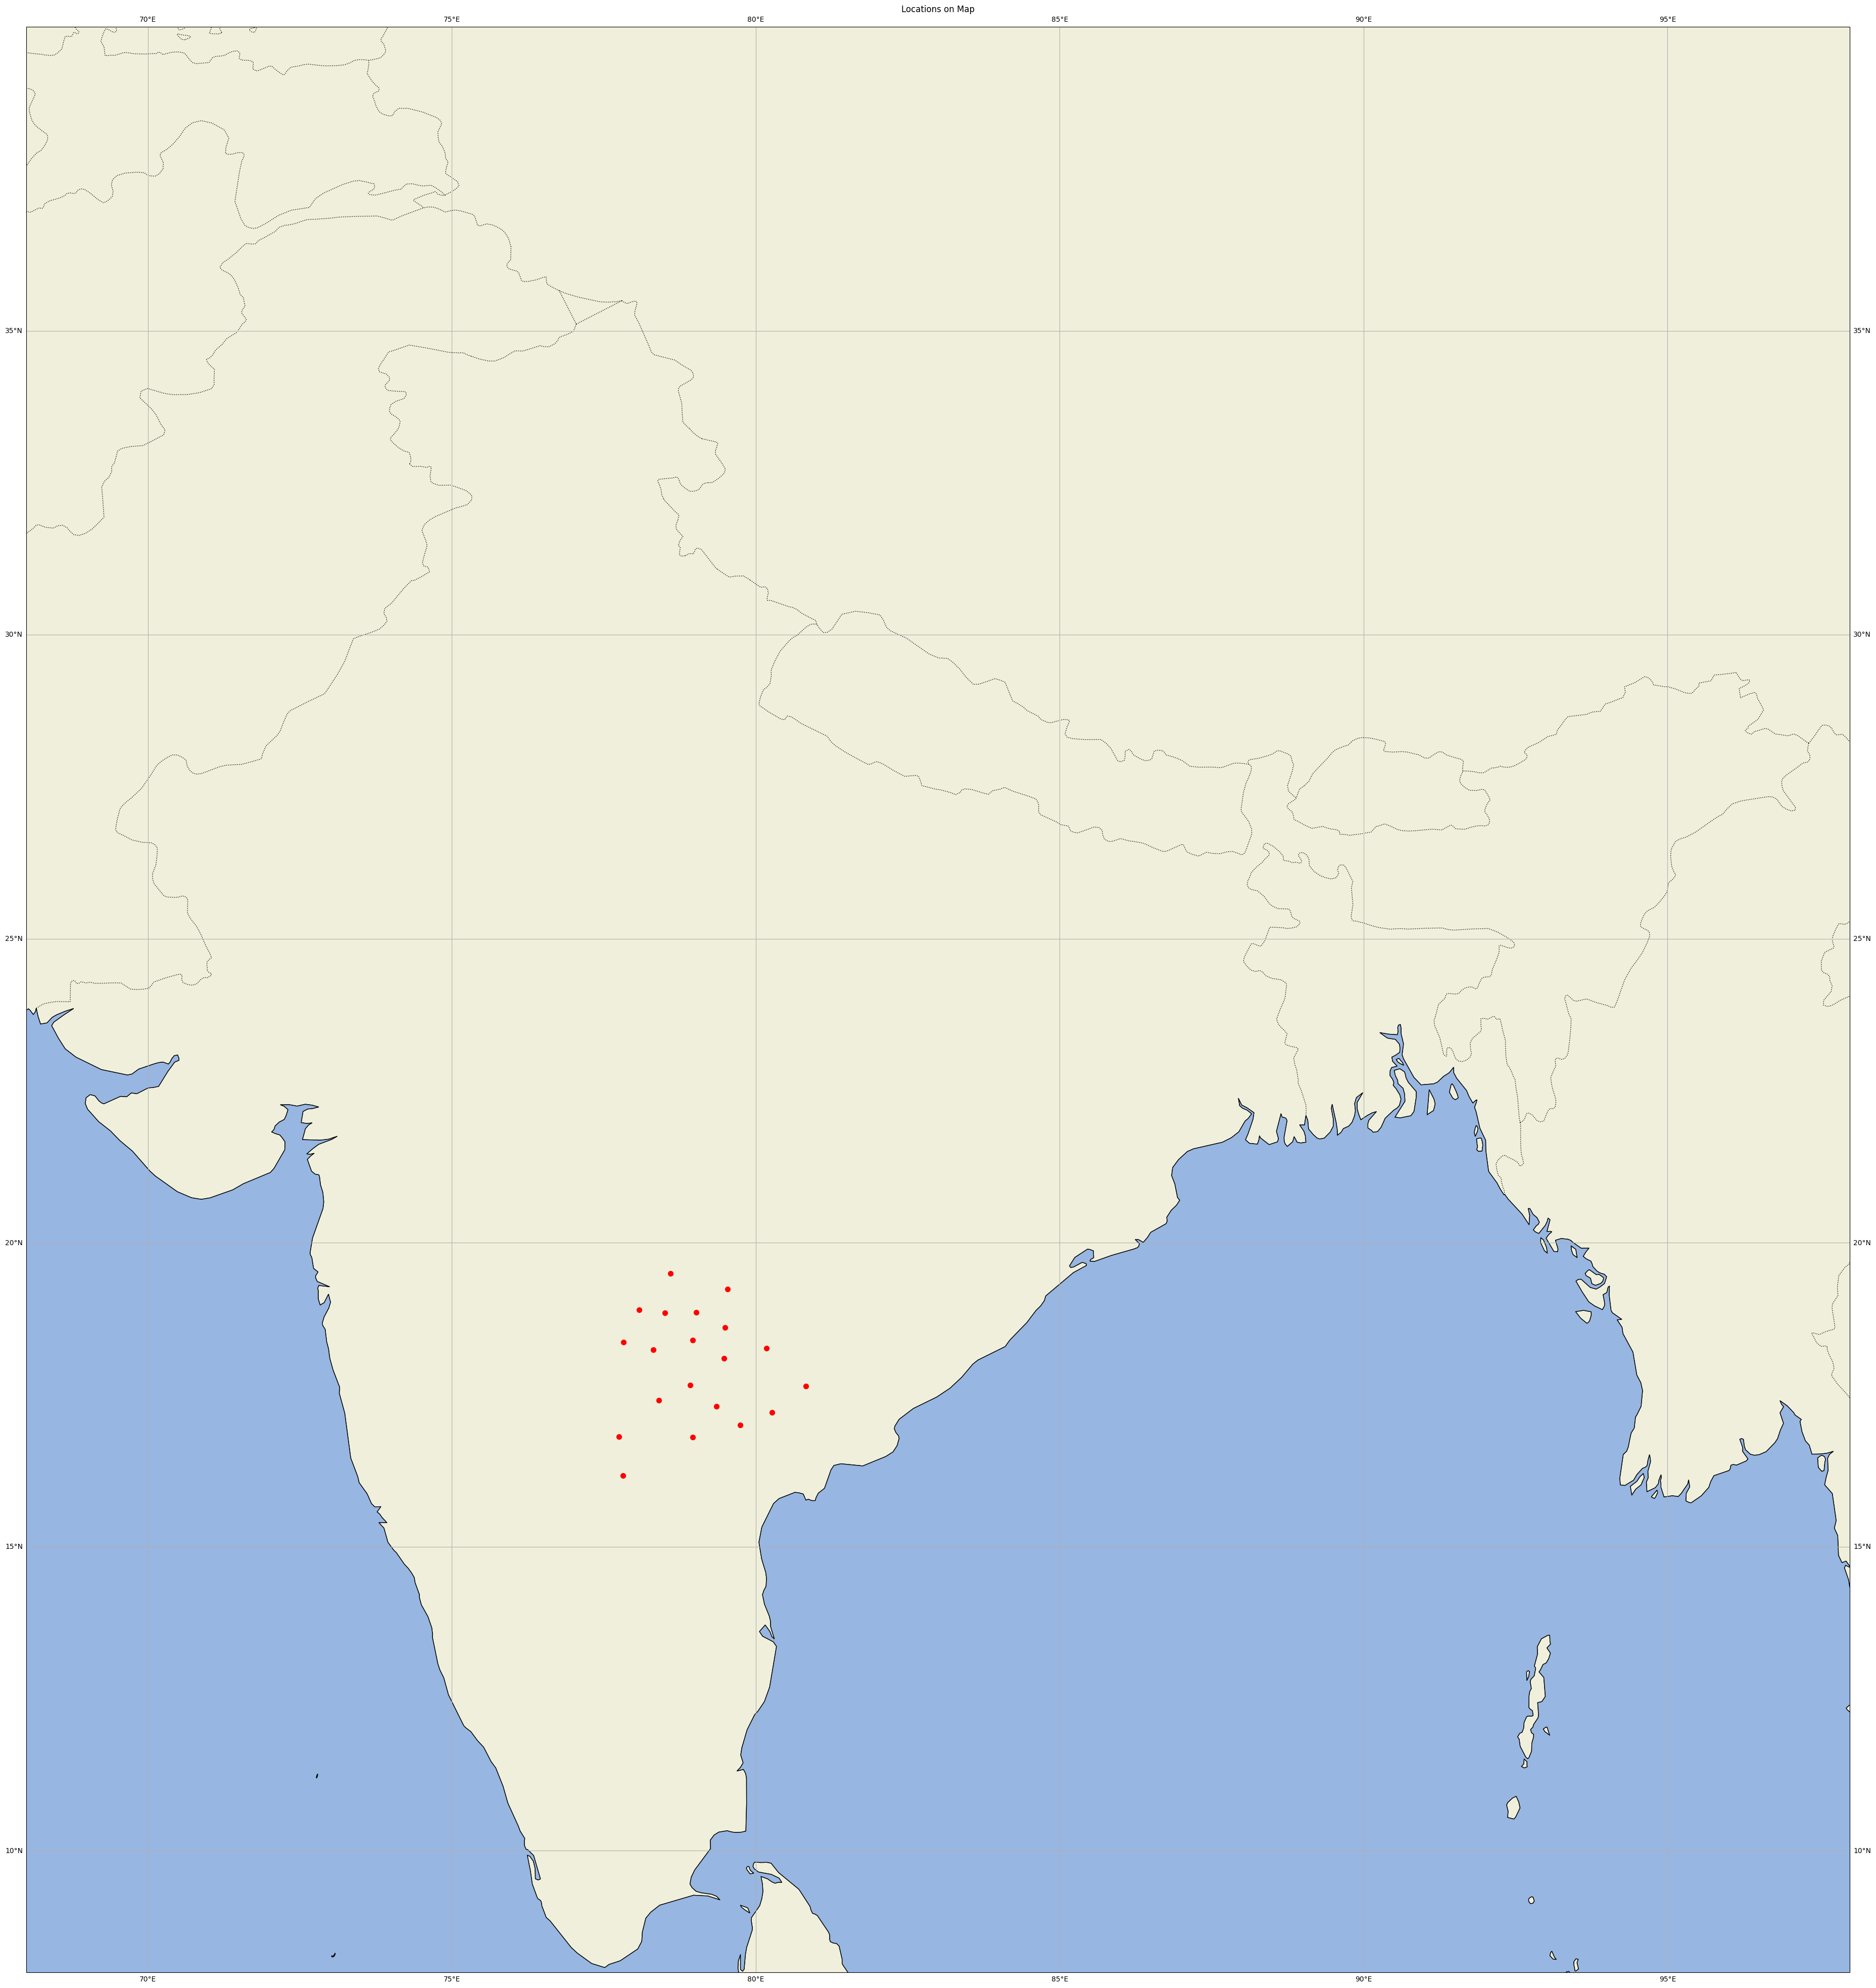

In [63]:
# Create a figure and a map projection
fig = plt.figure(figsize=(100, 50))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Plot the points
plt.scatter(clustering[:,0], clustering[:,1], color='red', s=50, transform=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True)

# Set extent (optional, to zoom into a region)
#ax.set_extent([68, 98, 0, 40], crs=ccrs.PlateCarree())
ax.set_extent([68,98, 8, 40], crs=ccrs.PlateCarree())

plt.title('Locations on Map')
plt.show()